# Sistema de bicis compartidas - Bikeshare

Vamos a analizar y modelar el sistema con funciones de Python

*Modeling and Simulation in Python*
##### Archivo original: https://colab.research.google.com/github/AllenDowney/ModSimPy/blob/master/chapters/chap02.ipynb
#####Acceso a los capítulos: https://allendowney.github.io/ModSimPy/

## Modelando un sistema de bicis compartidas entre la UM y el comedor de la UM.
Imagine un sistema de bicicletas compartidas para estudiantes que viajan entre UM y comedor de la UM, que están a unas cuadras de distancia.

Suponga que el sistema contiene 12 bicicletas y dos portabicicletas (o bicicleteros), uno en cada lugar con capacidad para 12 bicicletas.

A medida que los estudiantes llegan al bicicletero de la UM, sacan una bicicleta y van al comdeor, la cantidad de bicicletas en cada ubicación cambia. En la simulación, vamos a registrar los cambios en la cantida de bicis; necesitaremos hacer un seguimiento de dónde están las bicicletas.

La cantidad de bicicletas en cada uno de los bicicleteros, serán nuestras *variables de estado*. Usaremos una función llamada "State()", que se define en la biblioteca ModSim, para guardar sus valores.

### Definimos la función de estado del sistema

In [1]:
# install Pint
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 3.5 MB/s eta 0:00:00


In [2]:
# download modsim.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [ ]:
#también se puede instalar con pip
#!pip install pint
#pip install modsimpy  ###ya no funciona más

In [3]:
# importamos la librería y las funciones
import modsim as ms
from modsim import *

In [4]:
bikeshare = ms.State(um=10, comedor=2)

La función `State` almacena dos variables y sus valores en un objeto de tipo `State`.

Estas dos variables son *variables de estado* y representan la cantidad de bicicletas que hay en cada ubicación.

El objeto `State` se asigna a una nueva variable denominada bikeshare.
Podemos obtener el valor de una variable en un objeto usando el operador punto.

In [5]:
bikeshare.um

10

y:

In [6]:
bikeshare.comedor

2

O para mostrar todas las *variables de estado* y sus valores:

In [7]:
bikeshare

um         10
comedor     2
Name: state, dtype: int64

Estos valores constituyen el *estado* del sistema.

ModSim tiene la función `show` que permite visualizar al objeto `State` como una tabla. Permite ver los resultados de una manera más cómoda.

In [8]:
show(bikeshare)

,state
um,10
comedor,2


### Actualizando el estado del sistema

Podemos actualizar el estado asignando nuevos valores a las variables. Por ejemplo, si un estudiante mueve una bicicleta de la UM al comedor, podemos calcular los nuevos valores y asignarlos:

In [9]:
bikeshare.um = 9
bikeshare.comedor = 3

### Definiendo Funciones de actualización de estado



In [10]:
bikeshare.um -= 1
bikeshare.comedor += 1

Para no tener que repetir estas dos líneas cdo queremos mover una bici de la um al comedor definimos una función que lo haga:

In [11]:
def bike_hacia_comedor():
  """ función que lleva una sóla bici desde la um al comedor"""
  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1

In [12]:
bike_hacia_comedor()

Se movió una bici al comedor


In [13]:
bikeshare

um         7
comedor    5
Name: state, dtype: int64

In [14]:
def bike_hacia_um():
  """ función que lleva una sóla bici desde el comedor a la um"""
  print("Se movió una bici a la UM")
  bikeshare.comedor -= 1
  bikeshare.um += 1

`def` es una palabra especial en Python que indica que estamos definiendo un nueva función. El nombre de la función es `bike_hacia_um`. Los paréntesis vacíos indican que esta función no requiere información cuando se ejecuta. Y luego de los dos puntos comienza con una sangría el *bloque de código*.

Las siguientes dos líneas son el *cuerpo* de la función con la sangría de cuatro espacios.

Cuando define una función, no tiene un efecto inmediato. El cuerpo de la función no se ejecuta hasta que *se llama* a la función. Así es como se llama a esta función:

In [15]:
bike_hacia_um()

Se movió una bici a la UM


Cuando llamas a la función, ejecuta las sentencias en el cuerpo. En este ejemplo, estas sentencias actualizan las variables del objeto `bikeshare`. Para verificarlo podemos mostrar el nuevo estado.

In [16]:
show(bikeshare)

,state
um,8
comedor,4


### Simulando usuarios

Simular las frecuencias de uso de esas bicicletas. Es decir, vamos a determinar cuándo llega un estudiante a usar una bici.


Supongamos que un alumuno/a usa una bici para ir de la UM al comedor, con un 50% probabilidad. Y en sentido contrario, con un 30% de probabalidad de uso.
Existe una mayor probabilidad de uso en la UM que en el comedor. Esto indica que será mas probable que viajen de la UM al comedor que al revés.

Será modelado con una función aleatoria, que nos dará de resultado, de acuerdo a una probabilidad, si el evento sucede o no. Ej.: el estudiante que podría ir de la UM al comedor, fue o no fue.

La función *flip()* simula/genera "lanzamientos de una moneda" aleatorios, en la que uno de los lados es verdadero y el otro falso. Para llamar a la función flip() hay que proporcionarle una probabilidad entre 0 y 1.

In [17]:
flip(0.3) #probabilidad del comedor a la UM

False

El resultado es uno de dos valores: Verdadero con probabilidad 0,3 (en este ejemplo) o Falso con probabilidad 0,7. Si ejecuta flip como este 100 veces, debería obtener Verdadero unas 30 veces y Falso unas 70 veces. Pero los resultados son aleatorios, por lo que pueden diferir de estas expectativas.

Podemos usar valores booleanos para controlar el comportamiento del programa, usando una sentencia if:

Ahora podemos usar flip para simular la llegada de clientes que quieren pedir prestada una bicicleta. Suponga que la posibilidad de una llegada durante un minuto es del 50 %, y podemos simularlo así:

In [18]:
if flip(0.5):
    bike_hacia_comedor()

In [19]:
if flip(0.30):
    bike_hacia_um()

Podemos combinar estos fragmentos en una función que simule un paso de tiempo, que es un intervalo de tiempo, en este caso un minuto:

In [23]:
def step():
  """funcion que actualiza el sistema"""

  if flip(0.5):
        bike_hacia_comedor()
  if flip(0.33):
        bike_hacia_um()

Podemos simular un paso de tiempo como:

In [24]:
step()

Se movió una bici al comedor
Se movió una bici a la UM


Dependiendo de los resultados de `flip` esta función, podría mover una bici de UM al comedor o  al revés, o ninguna o ambas.

## Parámetros


En lugar de poner los valores constantes 0.5 y 0.33 en el `step`, podemos reemplazarlos con parámetros. Los parámetros son variables cuyos valores se establecen cuando se llama a una función.

Aquí hay una versión del `step` que toma dos parámetros, `p1` y `p2`:

In [25]:
def step(p1, p2):
  if flip(p1):
        bike_hacia_comedor()
  if flip(p2):
        bike_hacia_um()

Los valores de `p1` y `p2` no se establecen dentro de esta función; en cambio,
se proporcionan cuando se llama a la función, así:

In [30]:
step(0.5, 0.33)

Se movió una bici al comedor
Se movió una bici a la UM


La ventaja de usar parámetros es que puede llamar a la misma función muchas veces, proporcionando diferentes argumentos cada vez.

Agregar parámetros a una función se llama "generalización", porque hace que la función sea más general; sin parámetros, la función siempre hace lo mismo; con parámetros, puede hacer una variedad de cosas.

## For Loops

Una manera fácil de repetir un trozo de código cuando sabemos la cantidad de veces que queremos repetirlo, es el *bucle for*. Un ejemplo:

In [33]:
for i in range(3):
    print("paso de tiempo: ", i)
    step(0.5,0.3)
    print("  ---  ")

paso de tiempo:  0
Se movió una bici a la UM
  ---  
paso de tiempo:  1
Se movió una bici al comedor
  ---  
paso de tiempo:  2
Se movió una bici al comedor
Se movió una bici a la UM
  ---  


Los elementos del bucle son:

Las palabras `for` y `in` son palabras especiales que tenemos que usar en un ciclo for.

`range` es una función de Python que usamos para controlar la cantidad de veces que se ejecuta el ciclo.

`i` es una variable de bucle que se crea cuando se ejecuta el bucle for.

Cuando se ejecuta este ciclo, ejecuta las declaraciones dentro del ciclo tres veces. La primera vez, el valor de `i` es 0; la segunda vez, es 1; la tercera vez, es 2.

Cada vez que pasa por el bucle, imprime el valor de `i` y mueve una bicicleta a la UM o una bicicleta al comedor,ambas o niguna de las dos.

## TimeSeries



Cuando ejecutamos una simulación, queremos guardar los resultados para un análisis posterior. La biblioteca ModSim proporciona un objeto `TimeSeries` para este propósito. Un objeto `TimeSeries` contiene una secuencia de "marcas de tiempo" y una secuencia correspondiente de "cantidades".

En este ejemplo, las marcas de tiempo son números enteros que representan minutos y las cantidades son el número de bicicletas en un lugar.

Comencemos de nuevo con un nuevo `State`.

In [34]:
bikeshare = State(um=10, comedor=2)

Podemos crear un nuevo `TimeSeries` vacío como:

In [35]:
resultado_um = TimeSeries() #Esto es un Series de pandas

Y agregarle una cantidad como esta:

El número entre corchetes es la marca de tiempo, también llamada *etiqueta*. Sería el índice de nuestro "resultado".

Podemos usar un `TimeSeries` dentro de un ciclo for para almacenar los resultados de la simulación:

In [36]:
for i in range(10):
    print(i)
    step(0.6, 0.6)
    resultado_um[i] = bikeshare.um

0
Se movió una bici a la UM
1
Se movió una bici a la UM
2
Se movió una bici al comedor
3
Se movió una bici al comedor
4
Se movió una bici a la UM
5
Se movió una bici a la UM
6
Se movió una bici al comedor
7
Se movió una bici a la UM
8
Se movió una bici a la UM
9
Se movió una bici al comedor


Cada vez que recorremos el bucle, imprimimos el valor de `i` y llamamos a `step`, que actualiza `bikeshare`. Luego almacenamos el número de bicicletas de la UM en los resultados. Usamos la variable de bucle, `i`.

Cuando el ciclo sale, los resultados contienen 3 marcas de tiempo, de 0 a 2, y el número de bicicletas de la UM al final de cada paso de tiempo.

Podemos mostrar el `TimeSeries` así:

In [37]:
show(resultado_um)

,Quantity
Time,
0,11
1,12
2,11
3,10
4,11
5,12
6,11
7,12
8,13


La columna de la izquierda son las marcas (pasos, step) de tiempo; la columna de la derecha son las cantidades

## Plotting
Existe una función llamada plot que podemos usar para graficar los resultados, y la biblioteca ModSim proporciona "decorate", que podemos usar para etiquetar los ejes y darle un título a la figura:

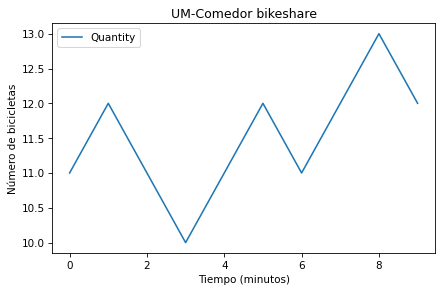

In [38]:
resultado_um.plot()
#plot(resultado_um, label = "UM")

decorate(title='UM-Comedor bikeshare',
         xlabel='Tiempo (minutos)',
         ylabel='Número de bicicletas')


El resultado debería ser una gráfica con el tiempo en el eje $x$ y el número de bicicletas en el eje $y$.

## Plotting Comedor

In [39]:
resultado_comedor = TimeSeries()

for i in range(10):
    print(i)
    step(0.6,0.6)
    resultado_comedor[i] = bikeshare.comedor

0
Se movió una bici al comedor
1
Se movió una bici al comedor
Se movió una bici a la UM
2
Se movió una bici al comedor
Se movió una bici a la UM
3
Se movió una bici al comedor
Se movió una bici a la UM
4
Se movió una bici a la UM
5
Se movió una bici al comedor
6
Se movió una bici al comedor
Se movió una bici a la UM
7
Se movió una bici al comedor
Se movió una bici a la UM
8
Se movió una bici al comedor
Se movió una bici a la UM
9
Se movió una bici al comedor


In [40]:
show(resultado_comedor)

,Quantity
Time,
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1


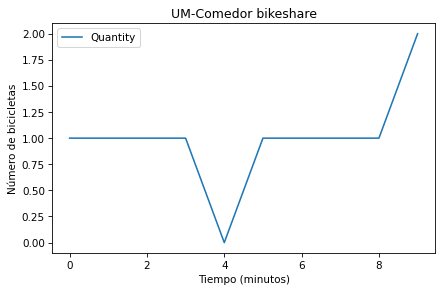

In [41]:
resultado_comedor.plot()

decorate(title='UM-Comedor bikeshare',
         xlabel='Tiempo (minutos)',
         ylabel='Número de bicicletas')

## Resumen

Este capítulo presenta las herramientas que necesitamos para ejecutar simulaciones, registrar los resultados y graficarlos.

Usamos un objeto `State` para representar el estado del sistema.
Luego usamos la función `flip` y una declaración `if` para simular un solo paso de tiempo.
Usamos un ciclo `for` para simular una serie de pasos y un `TimeSeries` para registrar los resultados.
Finalmente, usamos `plot` y `decorate` para trazar los resultados.

En el próximo capítulo, ampliaremos esta simulación para hacerla un poco más realista.